
CS512 - Computer Vision - Assignment 1

Submitted by-

Tushar Gwal A20449419

In [46]:
#Libraries_used
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Homogeneous Coordinates Representation (2D)

In [52]:
# Given point in 2D-Cartesian coordinates
x = np.array([2, 3])

#Part 1: Converting given x to homogeneous coordinates x_h
x_h = np.array([x[0], x[1], 1])
print("Homogeneous coordinates: x_h = ", x_h)

#Part 2: Scaling the homogeneous coordinate
xdash_h = x_h * 2     #scaling factor = 2
print("Scaled homogeneous coordinates: x'h =", xdash_h)

#Part 3: Converting back to Cartesian coordinates
x_dash = np.array([xdash_h[0]/xdash_h[2],xdash_h[1]/xdash_h[2]])
print("Scaled Cartesian coordinates: x' =", x_dash)

print("Original Cartesian coordinates: x =", x)
print("Hence, Both x_h and x'h represents the same point x in the cartesian coordinate")

Homogeneous coordinates: x_h =  [2 3 1]
Scaled homogeneous coordinates: x'h = [4 6 2]
Scaled Cartesian coordinates: x' = [2. 3.]
Original Cartesian coordinates: x = [2 3]
Hence, Both x_h and x'h represents the same point x in the cartesian coordinate


# Question 2: Homogeneous Coordinates Representation (3D)

In [ ]:
# Given point in 3D-Cartesian coordinates
y = np.array([4, 5, 6])

#Part 1:  Converting given y to homogeneous coordinates y_h
y_h = np.array([y[0], y[1], y[2], 1])
print("Homogeneous coordinates: y_h = ", y_h)

#Part 2:  Scaling the given homogeneous point Ун = (4, 5, 6, 1)
ydash_h = y_h * 2     #scaling factor = 2
print("Scaled homogeneous coordinates: y'h =", ydash_h)

y_dash = np.array([ydash_h[0]/ydash_h[3],ydash_h[1]/ydash_h[3],ydash_h[2]/ydash_h[3]])   # Converting back to Cartesian coordinates
print("Scaled Cartesian coordinates: y' =",y_dash)

print("Original Cartesian coordinates: y =", y)

# Verifying if the result matches the original point y
if(np.array_equal(y,y_dash)):
    print("Hence, Both y_h and y'h represents the same point y in the cartesian coordinate which also signifies that the scalling of homogenous coordinate preserves the original point in cartesian space.")



Homogeneous coordinates: y_h =  [4 5 6 1]
Scaled homogeneous coordinates: y'h = [ 8 10 12  2]
Scaled Cartesian coordinates: y' = [4. 5. 6.]
Original Cartesian coordinates: y = [4 5 6]
Hence, Both y_h and y'h represents the same point y in the cartesian coordinate which also signifies that the scalling of homogenous coordinate preserves the original point in cartesian space.


# Question 3: Affine Transformations in 2D

In [43]:
#Part 1: Defining the transformation matrices for..
s = np.array([[3, 0, 0], [0, 3, 0], [0, 0, 1]])              # S(3) - Scaling matrix with factor 3

d = np.deg2rad(45)
r = np.array([[np.cos(d), -np.sin(d), 0], [np.sin(d), np.cos(d), 0], [0, 0, 1]])                 # R(45) - 45 degrees counterclockwise Rotation matrix

t= np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]])                # T(2,3) - Translation matrix

#Part 2: Combining the transformation matrices
m = np.dot(t, np.dot(r, s))

#Part 3: Applying the combined transformation to p
p_h = np.array([1, 2, 1])     # Converting the given point p = (1, 2) in 2D to homogeneous coordinates
p_h_t = np.dot(m, p_h)

# Converting it back to Cartesian coordinates
p_T = p_h_t[:2] / p_h_t[2]

# printing the results
print("Combined Transformation Matrix: \n", m)
print("Transformed Point p after scaling, rotating, and translating using Combined Transformation Matrix : ", p_T)

#For verification
# calculating it indivdually at each step
p_s = np.dot(s, p_h)
p_r = np.dot(r, p_s)
p_t = np.dot(t, p_r)
p_t = p_t[:2] / p_t[2]

print("Final value of Point p by applying scaling, rotation, and translation at each step : ", p_T)

if(np.array_equal(p_t,p_T)):
    print("\n Hence verified, both the final values are same")

Combined Transformation Matrix: 
 [[ 2.12132034 -2.12132034  2.        ]
 [ 2.12132034  2.12132034  3.        ]
 [ 0.          0.          1.        ]]
Transformed Point p after scaling, rotating, and translating using Combined Transformation Matrix :  [-0.12132034  9.36396103]
Final value of Point p by applying scaling, rotation, and translation at each step :  [-0.12132034  9.36396103]

 Hence verified, both the final values are same


# Question 4: Inverse Transformations (2D)

In [67]:
#Part 1: Defining the inverse transformation matrices
ti = np.array([[1, 0, -5], [0, 1, -5], [0, 0, 1]])                #Inverse Matrix for T(5, 5) is T(-5,-5)

d = np.deg2rad(-30)
ri = np.array([[np.cos(d), -np.sin(d), 0], [np.sin(d), np.cos(d), 0], [0, 0, 1]])               #Inverse Matrix for R(30) is R(-30) ,i.e, in order to reverse the rotation by 30°, we rotate it clockwise by 30°

si = np.array([[1/2, 0, 0], [0, 1/2, 0], [0, 0, 1]])              #Inverse Matrix for S(2) is S(1/2)

#Part 2: Combinning the inverse transformation matrices
i_m = np.dot(si, np.dot(ri, ti))

#Part 3: Applying the inverse transformation to q
q_h = np.array([3, 4, 1])     # Converting the given point q = (3, 4) in 2D to homogeneous coordinates
q_h_t = np.dot(i_m, q_h)


q_h_t = q_h_t[:2] / q_h_t[2]               # Converting q_h_t back to Cartesian coordinates

#Final_results
print("Inverse Transformation Matrix:\n", i_m)
print("Point 'q' original position: ",q_h_t)

Inverse Transformation Matrix:
 [[ 0.4330127   0.25       -3.41506351]
 [-0.25        0.4330127  -0.91506351]
 [ 0.          0.          1.        ]]
Point 'q' original position:  [-1.1160254  0.0669873]


# Question 5: Transformations Between 3D Coordinate Systems

In [44]:
#Part 1: Defining the transformation matrices for..

R = np.array([[0, -1, 0, 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])   # rotation matrix that rotates System A by 90° around the Z-axis

T = np.array([[1, 0, 0, 1],[0, 1, 0, 1], [0, 0, 1, 1], [0, 0, 0, 1]])  # translation matrix in order to move the origin(1, 1, 1) to (2, 2, 2):

#Part 2: Combininng the transformation matrices
T_A2B = np.dot(R, T)

#Part 3: Applying the transformation matrix to the point r
r_h = np.array([3, 3, 3, 1])      # converting the given point r = (3, 3, 3) in 3D to homogeneous coordinates
r_B = np.dot(T_A2B, r_h)

r_B = r_B[:3] / r_B[3]             #Converting the transformed point back to Cartesian coordinates

#Final_results
print("Combined Transformation Matrix:\n", T_A2B)
print("Transformed Point r in System B:", r_B)


Combined Transformation Matrix:
 [[ 0 -1  0 -1]
 [ 1  0  0  1]
 [ 0  0  1  1]
 [ 0  0  0  1]]
Transformed Point r in System B: [-4.  4.  4.]


# Question 6: Projection in Camera Coordinates (3D to 2D)

In [45]:
#Lets first define the 3D point P = (1, 2, 5) and the intrinsic matrix K
P = np.array([1, 2, 5])

K = np.array([[1000, 0, 500],[0, 1000, 500],[0, 0, 1]])

#Part 1: Projecting the 3D point to 2D Image Plane using the intrinsic matrix K
Pj_2D = np.dot(K, P)

#part 2: Computing the 2D pixel coordinates of the projected point
pxl = Pj_2D[:2] / Pj_2D[2]

print("Projected Homogeneous Coordinates:", Pj_2D)
print("2D Pixel Coordinates:", pxl)

#Part 3: Meaning of the elements of k
kg = np.array([
    ['fx', 's',  'cx'],
    [0,  'fy', 'cy'],
    [0,  0,  1]
])

print("\nMeaning of the elements of K:")
print("The intrinsic matrix defines how the camera’s lens and sensor project the 3D world onto a 2D plane and is given by : \n", kg)
print(f"In our case, \nfx = {K[0,0]} and fy = {K[1,1]}, which are focal lengths fx and fy respectively for the camera sensor in x and y dimensions.")
print("The entry s encodes any possible skew between the sensor axes due to the sensor not being mounted perpendicular to the optical axis which is 0 here.")
print(f"And cx = {K[0,2]} and cy = {K[1,2]} are (cx, cy) which denotes the optical center expressed in pixel coordinates.")

Projected Homogeneous Coordinates: [3500 4500    5]
2D Pixel Coordinates: [700. 900.]

Meaning of the elements of K:
The intrinsic matrix defines how the camera’s lens and sensor project the 3D world onto a 2D plane and is given by : 
 [['fx' 's' 'cx']
 ['0' 'fy' 'cy']
 ['0' '0' '1']]
In our case, 
fx = 1000 and fy = 1000, which are focal lengths fx and fy respectively for the camera sensor in x and y dimensions.
The entry s encodes any possible skew between the sensor axes due to the sensor not being mounted perpendicular to the optical axis which is 0 here.
And cx = 500 and cy = 500 are (cx, cy) which denotes the optical center expressed in pixel coordinates.


# Question 7: General camera model (3D World points to 2D Image points)

In [39]:
#Lets define the given camera parameters
k = np.array([[1200, 0, 640], [0, 1200, 360], [0, 0, 1]])  #intrinsic matrix k
r = np.eye(3)  # Identity matrix for R
t = np.array([[0], [0], [-10]])  # Translation vector t

#Part 1: Computation of extrinsic matrix from the rotation and translation
m = np.hstack((r, t))  # Combining R and t into [R|t]

x_h = np.array([2, 3, 4, 1])   #converting the 3D world point x= (2, 3, 4) in homogeneous coordinates

#Part 2: Projecting the point onto the image plane
P_3D = np.dot(m,x_h)     #camera coordinates
P_2D_h = np.dot(k,P_3D)

#Converting it to 2D pixel coordinates
pix = P_2D_h[:2] / P_2D_h[2]

#Printing results
print("Projected Homogeneous Coordinates:", P_2D_h)
print("2D Pixel Coordinates:", pix)


Projected Homogeneous Coordinates: [-1440.  1440.    -6.]
2D Pixel Coordinates: [ 240. -240.]


# Question 8: Image Transformation using cv2. warpAffine (2D)

affine matrix:
 [[ 1.29903811  0.75       75.        ]
 [-0.75        1.29903811 45.        ]
 [ 0.          0.          1.        ]]


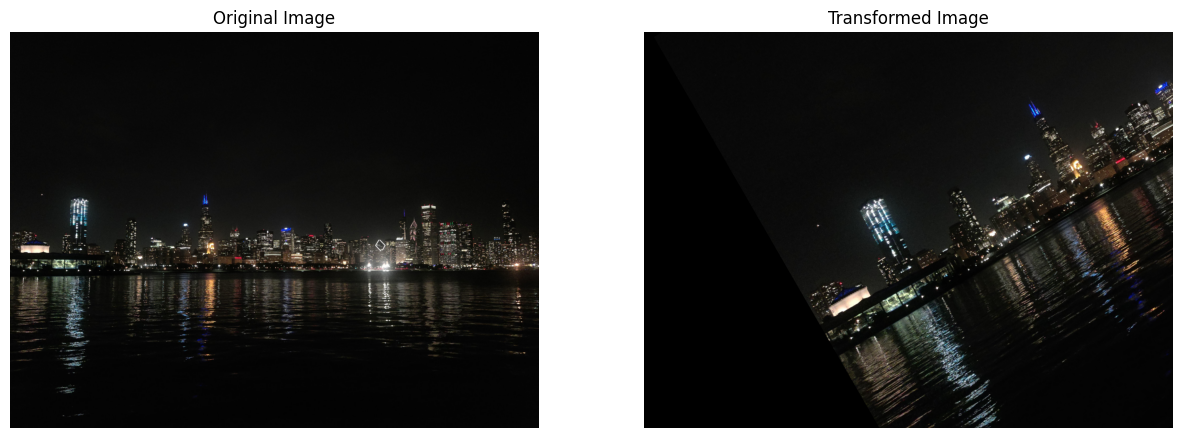

In [70]:
#Lets first define the transformation matrices..
s =  np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1]])        # S(1.5) - Scaling matrix (scaling by a factor of 1.5)

d = np.deg2rad(-30)
r= np.array([[np.cos(d), -np.sin(d), 0], [np.sin(d), np.cos(d), 0], [0, 0, 1]])  # R(-30) - Rotation matrix (30 degrees counterclockwise in image coordinates)

t = np.array([[1, 0, 50], [0, 1, 30], [0, 0, 1]])   # T(50, 30) - Translation Matrix

#Part 1: Combining the above matrices to get affine matrix
af = np.dot(s,np.dot(t,r))                             # order: Translate -> Rotate -> Scale
print("affine matrix:\n", af)

#Part 2: Applying transformation to the image using cv2.warpAffine function to
i= cv2.imread('/content/WhatsApp Image 2024-09-18 at 15.53.26_19bb74df.jpg')         # reading the image
af = af[:2, :3]              # resizing
h, w = i.shape[:2]           # getting image dimensions
ti= cv2.warpAffine(i, af, (w, h))

#Part 3: Displaying the original and transformed images
plt.figure(figsize=(15, 10))

#original_image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

#transformed_image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ti, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.show()


#Question 9: Order of Transformations

In [42]:
# Lets first define the given parameters and the transformation matrices

s_h = np.array([1, 1, 1])       # point s = (1,1) in 2D to homogeneous coordinates

R = np.array([[0, -1, 0], [1, 0, 0],[0, 0, 1]])           # R(90) - 90-degree counterclockwise rotation matrix

S = np.array([[2, 0, 0],[0, 2, 0],[0, 0, 1]])             # S(2) - Scaling matrix with factor 2

T = np.array([[1, 0, -1],[0, 1,  1],[0, 0, 1]])           # T(-1,1) - Translation matrix

#Part 1: Specified Order: Rotate -> Scale -> Translate
sr = np.dot(R, s_h)  # Applying rotation
ss = np.dot(S, sr)  # Applying scaling
st = np.dot(T, ss)  # Applying translation          'st' is the final value

#Part 2: Reverse Order: Translate -> Scale -> Rotate
rev_st = np.dot(T, s_h)  # Applying translation
rev_ss = np.dot(S, rev_st)  # Applying scaling
rev_sr= np.dot(R, rev_ss)  # Applying rotation      'rev_sr' is the final value


# Converting it back to Cartesian coordinates
st = st[:2] / st[2]
rev_sr = rev_sr[:2] / rev_sr[2]

# Final_results
print("Specified Order (Rotate -> Scale -> Translate):", st)
print("Reverse Order (Translate -> Scale -> Rotate):", rev_sr)

#Part 3: Conclusion based on result
print("\nObervation and Explanation: ")
print("The final position of s changes significantly depending on the order of transformations. ")
print("In the original order, s''' = (-3, 3), while in the reversed order, s''' = (-4, 0).")
print("It means that the order of transformations matters, and if we change the order, it could result in different final positions.")


Specified Order (Rotate -> Scale -> Translate): [-3.  3.]
Reverse Order (Translate -> Scale -> Rotate): [-4.  0.]

Obervation and Explanation: 
The final position of s changes significantly depending on the order of transformations. 
In the original order, s''' = (-3, 3), while in the reversed order, s''' = (-4, 0).
It means that the order of transformations matters, and if we change the order, it could result in different final positions.
